In [10]:
import os
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd
import yfinance as yf
from os import listdir
idx = pd.IndexSlice

In [2]:
# https://en.wikipedia.org/wiki/NIFTY_50
nifty50_url = 'https://en.wikipedia.org/wiki/NIFTY_50'
nifty50 = pd.read_html(nifty50_url, header=0)[1]

In [3]:
nifty50.head(3)

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Asian Paints,ASIANPAINT.NS,Consumer Goods
2,Axis Bank,AXISBANK.NS,Banking


## Nifty

In [6]:
DATA_STORE = '../Data-Daily/india_asset.h5'

In [11]:
nifty50_m = pd.read_csv('ind_nifty50list.csv', index_col=[2])
nifty50_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,INE021A01026
AXISBANK,Axis Bank Ltd.,FINANCIAL SERVICES,EQ,INE238A01034


In [10]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty50/metadata', nifty50_m)

In [12]:
nifty100_m = pd.read_csv('ind_nifty100list.csv', index_col=[2])
nifty100_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ,INE358A01014
ADANIGREEN,Adani Green Energy Ltd.,POWER,EQ,INE364U01010


In [14]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty100/metadata', nifty100_m)

In [13]:
nifty200_m = pd.read_csv('ind_nifty200list.csv', index_col=[2])
nifty200_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
AUBANK,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017
AARTIIND,Aarti Industries Ltd.,CHEMICALS,EQ,INE769A01020


In [16]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty200/metadata', nifty200_m)

In [14]:
nifty500_m = pd.read_csv('ind_nifty500list.csv', index_col=[2])
nifty500_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
3MINDIA,3M India Ltd.,SERVICES,EQ,INE470A01017
ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE117A01022
POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE07Y701011


In [18]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty500/metadata', nifty500_m)

In [15]:
nifty100_mid_m = pd.read_csv('ind_niftymidcap100list.csv', index_col=[2])
nifty100_mid_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
AUBANK,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017
AARTIIND,Aarti Industries Ltd.,CHEMICALS,EQ,INE769A01020
ADANIENT,Adani Enterprises Ltd.,SERVICES,EQ,INE423A01024


In [20]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty100_mid/metadata', nifty100_mid_m)

In [16]:
nifty100_small_m = pd.read_csv('ind_niftysmallcap100list.csv', index_col=[2])
nifty100_small_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
AEGISCHEM,Aegis Logistics Ltd.,OIL & GAS,EQ,INE208C01025
AFFLE,Affle (India) Ltd.,IT,EQ,INE00WC01019
ALOKINDS,Alok Industries Ltd.,TEXTILES,EQ,INE270A01029


In [23]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty100_small/metadata', nifty100_small_m)

In [24]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/nse/nifty100/metadata                  frame        (shape->[1,4])
/nse/nifty100_mid/metadata              frame        (shape->[1,4])
/nse/nifty100_small/metadata            frame        (shape->[1,4])
/nse/nifty200/metadata                  frame        (shape->[1,4])
/nse/nifty50/metadata                   frame        (shape->[1,4])
/nse/nifty500/metadata                  frame        (shape->[1,4])


In [25]:
tickers = nifty500_m.index
tickers

Index(['3MINDIA', 'ABB', 'POWERINDIA', 'ACC', 'AIAENG', 'APLAPOLLO', 'AUBANK',
       'AARTIDRUGS', 'AARTIIND', 'AAVAS',
       ...
       'WELSPUNIND', 'WESTLIFE', 'WHIRLPOOL', 'WIPRO', 'WOCKPHARMA', 'YESBANK',
       'ZEEL', 'ZENSARTECH', 'ZYDUSWELL', 'ECLERX'],
      dtype='object', name='Symbol', length=501)

In [26]:
for ticker in tickers:
    df =  yf.download(f'{ticker}.NS',progress=True, actions=True,)
    df.drop('Close', inplace=True, axis=1)
    df.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         'Dividends':'dividend','Stock Splits':'split'}, inplace=True)
    df.index.name = 'date'
    df = df[~df.index.duplicated()]
    df.to_csv(f'../Data-Daily/nse/{ticker}.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [27]:
mf_etf_m = pd.read_csv('mf_etf_index.csv', index_col=[2])
mf_etf_m.head(3)

,Company Name,Industry,Series,ISIN Code,Unnamed: 5
Symbol,,,,,
^CNX100,NIFTY 100,NaN,Index,NaN,NaN
^NSEI,NIFTY 50,NaN,Index,NaN,NaN
^CRSLDX,NIFTY 500,NaN,Index,NaN,NaN


In [31]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('mf_eft/metadata', mf_etf_m)

In [32]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/mf_eft/metadata                        frame        (shape->[23,5])
/mf_eft/mf_etf/metadata                 frame        (shape->[23,5])
/nse/nifty100/metadata                  frame        (shape->[1,4]) 
/nse/nifty100_mid/metadata              frame        (shape->[1,4]) 
/nse/nifty100_small/metadata            frame        (shape->[1,4]) 
/nse/nifty200/metadata                  frame        (shape->[1,4]) 
/nse/nifty50/metadata                   frame        (shape->[1,4]) 
/nse/nifty500/metadata                  frame        (shape->[1,4]) 


In [33]:
with pd.HDFStore(DATA_STORE) as store:
    store.remove('mf_eft/mf_etf/metadata')

In [34]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/mf_eft/metadata                        frame        (shape->[23,5])
/nse/nifty100/metadata                  frame        (shape->[1,4]) 
/nse/nifty100_mid/metadata              frame        (shape->[1,4]) 
/nse/nifty100_small/metadata            frame        (shape->[1,4]) 
/nse/nifty200/metadata                  frame        (shape->[1,4]) 
/nse/nifty50/metadata                   frame        (shape->[1,4]) 
/nse/nifty500/metadata                  frame        (shape->[1,4]) 


In [35]:
tickers = mf_etf_m.index
tickers

Index(['^CNX100', '^NSEI', '^CRSLDX', '^BSESN', 'BSE-100.BO', 'BSE-500.BO',
       '^NSEBANK', 'SETFNIF50.NS', 'SETFNIFBK.NS', 'SBISENSEX.BO',
       '0P0000OQWT.BO', '0P00005V68.BO', '0P00005WF0.BO', '0P0000GB48.BO',
       '0P0000XV6O.BO', '0P00005V77.BO', '0P00005X02.BO', '0P0000YWL0.BO',
       '0P0000XV9V.BO', '0P0000MLHH.BO', '0P0000WCFZ.BO', 'QNIFTY.BO',
       '0P0000XVWL.BO'],
      dtype='object', name='Symbol')

In [37]:
for ticker in tickers:
    df =  yf.download(f'{ticker}',progress=True, actions=True,)
    df.drop('Close', inplace=True, axis=1)
    df.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         'Dividends':'dividend','Stock Splits':'split'}, inplace=True)
    df.index.name = 'date'
    df = df[~df.index.duplicated()]
    df.to_csv(f'../Data-Daily/nse/{ticker}.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [39]:
path = '../Data-Daily/nse'

In [40]:
tickers = [f[:-4] for f in listdir(path)]
tickers

['0P00005V68',
 '0P00005V77',
 '0P00005WF0',
 '0P00005X02',
 '0P0000GB48',
 '0P0000MLHH',
 '0P0000OQWT',
 '0P0000WCFZ',
 '0P0000XV6O',
 '0P0000XV9V',
 '0P0000XVWL',
 '0P0000YWL0',
 '3MINDIA',
 'AARTIDRUGS',
 'AARTIIND',
 'AAVAS',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ACC',
 'ADANIENT',
 'ADANIGAS',
 'ADANIGREEN',
 'ADANIPORTS',
 'ADANITRANS',
 'ADVENZYMES',
 'AEGISCHEM',
 'AFFLE',
 'AIAENG',
 'AJANTPHARM',
 'AKZOINDIA',
 'ALEMBICLTD',
 'ALKEM',
 'ALKYLAMINE',
 'ALOKINDS',
 'AMARAJABAT',
 'AMBER',
 'AMBUJACEM',
 'APLAPOLLO',
 'APLLTD',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASHOKA',
 'ASHOKLEY',
 'ASIANPAINT',
 'ASTERDM',
 'ASTRAL',
 'ASTRAZEN',
 'ATUL',
 'AUBANK',
 'AUROPHARMA',
 'AVANTIFEED',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJCON',
 'BAJAJELEC',
 'BAJAJFINSV',
 'BAJAJHLDNG',
 'BAJFINANCE',
 'BALKRISIND',
 'BALMLAWRIE',
 'BALRAMCHIN',
 'BANDHANBNK',
 'BANKBARODA',
 'BANKINDIA',
 'BASF',
 'BATAINDIA',
 'BAYERCROP',
 'BBTC',
 'BDL',
 'BEL',
 'BEML',
 'BERGEPAINT',
 'BHARATFORG',
 'B

In [41]:
def get(tickers): 
    def data(ticker):
        print('Processing...', f'{ticker}')
        return pd.read_csv('{}/{}.csv'.format(path, ticker), index_col=[0], parse_dates=[0])
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['ticker', 'date']))
               
prices = get(tickers)

Processing... 0P00005V68
Processing... 0P00005V77
Processing... 0P00005WF0
Processing... 0P00005X02
Processing... 0P0000GB48
Processing... 0P0000MLHH
Processing... 0P0000OQWT
Processing... 0P0000WCFZ
Processing... 0P0000XV6O
Processing... 0P0000XV9V
Processing... 0P0000XVWL
Processing... 0P0000YWL0
Processing... 3MINDIA
Processing... AARTIDRUGS
Processing... AARTIIND
Processing... AAVAS
Processing... ABB
Processing... ABBOTINDIA
Processing... ABCAPITAL
Processing... ABFRL
Processing... ACC
Processing... ADANIENT
Processing... ADANIGAS
Processing... ADANIGREEN
Processing... ADANIPORTS
Processing... ADANITRANS
Processing... ADVENZYMES
Processing... AEGISCHEM
Processing... AFFLE
Processing... AIAENG
Processing... AJANTPHARM
Processing... AKZOINDIA
Processing... ALEMBICLTD
Processing... ALKEM
Processing... ALKYLAMINE
Processing... ALOKINDS
Processing... AMARAJABAT
Processing... AMBER
Processing... AMBUJACEM
Processing... APLAPOLLO
Processing... APLLTD
Processing... APOLLOHOSP
Processing...

Processing... POWERINDIA
Processing... PRAJIND
Processing... PRESTIGE
Processing... PRSMJOHNSN
Processing... PSPPROJECT
Processing... PTC
Processing... PVR
Processing... QNIFTY
Processing... QUESS
Processing... RADICO
Processing... RAIN
Processing... RAJESHEXPO
Processing... RALLIS
Processing... RAMCOCEM
Processing... RATNAMANI
Processing... RAYMOND
Processing... RBLBANK
Processing... RCF
Processing... RECLTD
Processing... REDINGTON
Processing... RELAXO
Processing... RELIANCE
Processing... RITES
Processing... RVNL
Processing... SAIL
Processing... SANOFI
Processing... SBICARD
Processing... SBILIFE
Processing... SBIN
Processing... SBISENSEX
Processing... SCHAEFFLER
Processing... SCHNEIDER
Processing... SCI
Processing... SEQUENT
Processing... SETFNIF50
Processing... SETFNIFBK
Processing... SFL
Processing... SHILPAMED
Processing... SHOPERSTOP
Processing... SHREECEM
Processing... SHRIRAMCIT
Processing... SIEMENS
Processing... SIS
Processing... SJVN
Processing... SKFINDIA
Processing... SOBHA

In [43]:
prices.tail()

open          high           low         close  \
ticker date                                                                 
^NSEI  2020-12-04  13177.400391  13280.049805  13152.849609  13258.549805   
       2020-12-07  13264.849609  13366.650391  13241.950195  13355.750000   
       2020-12-08  13393.849609  13435.450195  13311.049805  13392.950195   
       2020-12-09  13458.099609  13548.900391  13449.599609  13529.099609   
       2020-12-10  13488.500000  13503.549805  13399.299805  13478.299805   

                     volume  dividend  split  
ticker date                                   
^NSEI  2020-12-04  640500.0       0.0    0.0  
       2020-12-07  591700.0       0.0    0.0  
       2020-12-08  543200.0       0.0    0.0  
       2020-12-09  502600.0       0.0    0.0  
       2020-12-10       0.0       0.0    0.0

In [44]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('ind/equity/prices', prices)

In [45]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/ind/equity/prices                      frame        (shape->[1755502,7])
/mf_eft/metadata                        frame        (shape->[23,5])     
/nse/nifty100/metadata                  frame        (shape->[1,4])      
/nse/nifty100_mid/metadata              frame        (shape->[1,4])      
/nse/nifty100_small/metadata            frame        (shape->[1,4])      
/nse/nifty200/metadata                  frame        (shape->[1,4])      
/nse/nifty50/metadata                   frame        (shape->[1,4])      
/nse/nifty500/metadata                  frame        (shape->[1,4])      


In [60]:
with pd.HDFStore(DATA_STORE) as store:
    hdfc = store['/ind/equity/prices'].loc[idx['HDFC','2010':'2018'], 'close'].unstack('ticker')
#     stocks = store['us_equities/stocks'].loc[:, ['marketcap', 'ipoyear', 'sector']]

In [61]:
hdfc.head(3)

ticker,HDFC
date,
2010-01-04,429.764343
2010-01-05,431.226868
2010-01-06,433.299774


<AxesSubplot:xlabel='date'>

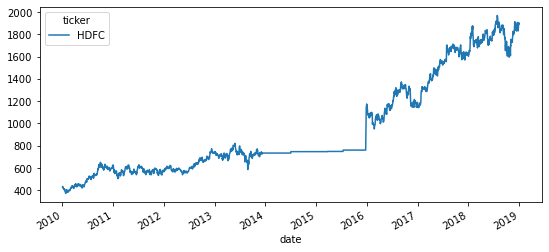

In [62]:
hdfc.plot(figsize=(9,4))

In [63]:
nifty500_m.head(3)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
3MINDIA,3M India Ltd.,SERVICES,EQ,INE470A01017
ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE117A01022
POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE07Y701011


In [65]:
nifty500_m = nifty500_m.reset_index().set_index('ISIN Code')
nifty500_m.head(3)

,Symbol,Company Name,Industry,Series
ISIN Code,,,,
INE470A01017,3MINDIA,3M India Ltd.,SERVICES,EQ
INE117A01022,ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ
INE07Y701011,POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ


In [67]:
bse50_m = pd.read_csv('S&P BSE SENSEX 50index_Constituents.csv', index_col=[2])
bse50_m.head(3)

,Scrip Code,COMPANY
ISIN No.,,
INE742F01042,532921,Adani Ports and Special Economic Zone
INE021A01026,500820,Asian Paints Ltd
INE238A01034,532215,Axis Bank Ltd


In [68]:
bse50_m = bse50_m.join(nifty500_m)
bse50_m.head(3)

,Scrip Code,COMPANY,Symbol,Company Name,Industry,Series
ISIN No.,,,,,,
INE742F01042,532921,Adani Ports and Special Economic Zone,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ
INE021A01026,500820,Asian Paints Ltd,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ
INE238A01034,532215,Axis Bank Ltd,AXISBANK,Axis Bank Ltd.,FINANCIAL SERVICES,EQ


In [70]:
bse50_m = bse50_m.dropna()
bse50_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, INE742F01042 to INE075A01022
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Scrip Code    49 non-null     int64 
 1   COMPANY       49 non-null     object
 2   Symbol        49 non-null     object
 3   Company Name  49 non-null     object
 4   Industry      49 non-null     object
 5   Series        49 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.7+ KB


In [71]:
bse50_m = bse50_m.reset_index().set_index('Symbol')
bse50_m.head(3)

,ISIN No.,Scrip Code,COMPANY,Company Name,Industry,Series
Symbol,,,,,,
ADANIPORTS,INE742F01042,532921,Adani Ports and Special Economic Zone,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ
ASIANPAINT,INE021A01026,500820,Asian Paints Ltd,Asian Paints Ltd.,CONSUMER GOODS,EQ
AXISBANK,INE238A01034,532215,Axis Bank Ltd,Axis Bank Ltd.,FINANCIAL SERVICES,EQ


In [72]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('bse/bse50/metadata', bse50_m)

In [73]:
bse500_m = pd.read_csv('S&P BSE 500index_Constituents.csv', index_col=[2])
bse500_m.head(3)

,Scrip Code,COMPANY,Close Price
ISIN No.,,,
INE470A01017,523395,3M India Ltd,22495.75
INE767A01016,524348,Aarti Drugs Ltd,766.80
INE769A01020,524208,Aarti Industries Ltd.,1212.30


In [74]:
bse500_m = bse500_m.join(nifty500_m)
bse500_m.head(3)

,Scrip Code,COMPANY,Close Price,Symbol,Company Name,Industry,Series
ISIN No.,,,,,,,
INE470A01017,523395,3M India Ltd,22495.75,3MINDIA,3M India Ltd.,SERVICES,EQ
INE767A01016,524348,Aarti Drugs Ltd,766.80,AARTIDRUGS,Aarti Drugs Ltd.,PHARMA,EQ
INE769A01020,524208,Aarti Industries Ltd.,1212.30,AARTIIND,Aarti Industries Ltd.,CHEMICALS,EQ


In [75]:
bse500_m = bse500_m.dropna()
bse500_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, INE470A01017 to INE768C01010
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Scrip Code    472 non-null    int64  
 1   COMPANY       472 non-null    object 
 2   Close Price   472 non-null    float64
 3   Symbol        472 non-null    object 
 4   Company Name  472 non-null    object 
 5   Industry      472 non-null    object 
 6   Series        472 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 29.5+ KB


In [76]:
bse500_m = bse500_m.reset_index().set_index('Symbol')
bse500_m.head(3)

,ISIN No.,Scrip Code,COMPANY,Close Price,Company Name,Industry,Series
Symbol,,,,,,,
3MINDIA,INE470A01017,523395,3M India Ltd,22495.75,3M India Ltd.,SERVICES,EQ
AARTIDRUGS,INE767A01016,524348,Aarti Drugs Ltd,766.80,Aarti Drugs Ltd.,PHARMA,EQ
AARTIIND,INE769A01020,524208,Aarti Industries Ltd.,1212.30,Aarti Industries Ltd.,CHEMICALS,EQ


In [77]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('bse/bse500/metadata', bse500_m)

In [78]:
tickers = bse500_m.index
tickers

Index(['3MINDIA', 'AARTIDRUGS', 'AARTIIND', 'AAVAS', 'ABB', 'POWERINDIA',
       'ABBOTINDIA', 'ACC', 'ADANIENT', 'ADANIGAS',
       ...
       'WABCOINDIA', 'WELCORP', 'WELSPUNIND', 'WESTLIFE', 'WHIRLPOOL', 'WIPRO',
       'WOCKPHARMA', 'ZEEL', 'ZENSARTECH', 'ZYDUSWELL'],
      dtype='object', name='Symbol', length=472)

In [79]:
for ticker in tickers:
    df =  yf.download(f'{ticker}.BO',progress=True, actions=True,)
    df.drop('Close', inplace=True, axis=1)
    df.rename(columns = {'Open':'open','High':'high','Low':'low','Adj Close':'close','Volume':'volume',
                         'Dividends':'dividend','Stock Splits':'split'}, inplace=True)
    df.index.name = 'date'
    df = df[~df.index.duplicated()]
    df.to_csv(f'../Data-Daily/bse/{ticker}.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAVAS.BO: 1d data not available for startTime=-2208988800 and endTime=1607622650. Only 100 years worth of day granularity data are allowed to be fetched per request.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- POWERINDIA.BO: 1d data not available for startTime=-2208988800 and endTime=1607622651. Only 100 years worth of day granularity data are allowed to be fetched per request.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 complete

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FLUOROCHEM.BO: 1d data not available for startTime=-2208988800 and endTime=1607622771. Only 100 years worth of day granularity data are allowed to be fetched per request.
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GUJGASLTD.BO: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*****************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RITES.BO: 1d data not available for startTime=-2208988800 and endTime=1607622901. Only 100 years worth of day granularity data are allowed to be fetched per request.
[*********************100%***********************]  1

In [82]:
path = '../Data-Daily/bse'

In [83]:
tickers = [f[:-4] for f in listdir(path)]
tickers

['3MINDIA',
 'AARTIDRUGS',
 'AARTIIND',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ACC',
 'ADANIENT',
 'ADANIPORTS',
 'ADANITRANS',
 'ADVENZYMES',
 'AIAENG',
 'AJANTPHARM',
 'AKZOINDIA',
 'ALKEM',
 'ALKYLAMINE',
 'AMARAJABAT',
 'AMBER',
 'AMBUJACEM',
 'APLAPOLLO',
 'APLLTD',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASHOKA',
 'ASHOKLEY',
 'ASIANPAINT',
 'ASTERDM',
 'ASTRAL',
 'ASTRAZEN',
 'ATUL',
 'AUBANK',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJELEC',
 'BAJAJFINSV',
 'BAJAJHLDNG',
 'BAJFINANCE',
 'BALKRISIND',
 'BALMLAWRIE',
 'BALRAMCHIN',
 'BANKBARODA',
 'BANKINDIA',
 'BASF',
 'BATAINDIA',
 'BAYERCROP',
 'BBTC',
 'BEL',
 'BEML',
 'BERGEPAINT',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BIRLACORPN',
 'BLISSGVS',
 'BLUEDART',
 'BLUESTARCO',
 'BOMDYEING',
 'BOSCHLTD',
 'BPCL',
 'BRIGADE',
 'BRITANNIA',
 'CADILAHC',
 'CANBK',
 'CANFINHOME',
 'CARBORUNIV',
 'CARERATING',
 'CASTROLIND',
 'CCL',
 'CEATLTD',
 'CENTRALBK',
 'CENTURYPLY',
 'CENTURYTEX',
 'CERA',
 'CESC',
 'CGCL

In [84]:
def get(tickers): 
    def data(ticker):
        print('Processing...', f'{ticker}')
        return pd.read_csv('{}/{}.csv'.format(path, ticker), index_col=[0], parse_dates=[0])
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['ticker', 'date']))
               
prices = get(tickers)

Processing... 3MINDIA
Processing... AARTIDRUGS
Processing... AARTIIND
Processing... ABB
Processing... ABBOTINDIA
Processing... ABCAPITAL
Processing... ABFRL
Processing... ACC
Processing... ADANIENT
Processing... ADANIPORTS
Processing... ADANITRANS
Processing... ADVENZYMES
Processing... AIAENG
Processing... AJANTPHARM
Processing... AKZOINDIA
Processing... ALKEM
Processing... ALKYLAMINE
Processing... AMARAJABAT
Processing... AMBER
Processing... AMBUJACEM
Processing... APLAPOLLO
Processing... APLLTD
Processing... APOLLOHOSP
Processing... APOLLOTYRE
Processing... ASHOKA
Processing... ASHOKLEY
Processing... ASIANPAINT
Processing... ASTERDM
Processing... ASTRAL
Processing... ASTRAZEN
Processing... ATUL
Processing... AUBANK
Processing... AUROPHARMA
Processing... AXISBANK
Processing... BAJAJ-AUTO
Processing... BAJAJELEC
Processing... BAJAJFINSV
Processing... BAJAJHLDNG
Processing... BAJFINANCE
Processing... BALKRISIND
Processing... BALMLAWRIE
Processing... BALRAMCHIN
Processing... BANKBARODA
P

Processing... TORNTPHARM
Processing... TORNTPOWER
Processing... TRENT
Processing... TRIDENT
Processing... TTKPRESTIG
Processing... TV18BRDCST
Processing... TVSMOTOR
Processing... TVTODAY
Processing... UBL
Processing... UCOBANK
Processing... UFLEX
Processing... UJJIVAN
Processing... ULTRACEMCO
Processing... UNIONBANK
Processing... UPL
Processing... VAIBHAVGBL
Processing... VAKRANGEE
Processing... VBL
Processing... VGUARD
Processing... VINATIORGA
Processing... VIPIND
Processing... VMART
Processing... VOLTAS
Processing... VRLLOG
Processing... VSTIND
Processing... VTL
Processing... WABCOINDIA
Processing... WELCORP
Processing... WELSPUNIND
Processing... WESTLIFE
Processing... WHIRLPOOL
Processing... WIPRO
Processing... WOCKPHARMA
Processing... ZEEL
Processing... ZENSARTECH
Processing... ZYDUSWELL


In [85]:
prices.tail()

open         high          low        close  \
ticker    date                                                             
ZYDUSWELL 2020-12-04  1828.550049  1839.599976  1821.000000  1827.699951   
          2020-12-07  1822.050049  1855.000000  1816.000000  1834.349976   
          2020-12-08  1849.000000  1855.849976  1830.699951  1847.800049   
          2020-12-09  1851.000000  1963.000000  1843.000000  1918.849976   
          2020-12-10  1920.000000  1938.449951  1875.000000  1895.400024   

                      volume  dividend  split  
ticker    date                                 
ZYDUSWELL 2020-12-04  2703.0       0.0    0.0  
          2020-12-07  3919.0       0.0    0.0  
          2020-12-08  1098.0       0.0    0.0  
          2020-12-09  8425.0       0.0    0.0  
          2020-12-10  5595.0       0.0    0.0

In [86]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('ind/bse500/prices', prices)

In [87]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/bse/bse50/metadata                     frame        (shape->[49,6])     
/bse/bse500/metadata                    frame        (shape->[472,7])    
/ind/bse500/prices                      frame        (shape->[1707187,7])
/ind/equity/prices                      frame        (shape->[1755502,7])
/mf_eft/metadata                        frame        (shape->[23,5])     
/nse/nifty100/metadata                  frame        (shape->[1,4])      
/nse/nifty100_mid/metadata              frame        (shape->[1,4])      
/nse/nifty100_small/metadata            frame        (shape->[1,4])      
/nse/nifty200/metadata                  frame        (shape->[1,4])      
/nse/nifty50/metadata                   frame        (shape->[1,4])      
/nse/nifty500/metadata                  frame        (shape->[1,4])      


In [97]:
with pd.HDFStore(DATA_STORE) as store:
    hdfc = store['/ind/bse500/prices'].loc[idx['HDFC','2010':'2018'], 'close'].unstack('ticker')
    #     stocks = store['us_equities/stocks'].loc[:, ['marketcap', 'ipoyear', 'sector']]

In [98]:
hdfc = hdfc['HDFC']
hdfc.head()

date
2010-01-04    427.251465
2010-01-05    428.674347
2010-01-06    430.112885
2010-01-07    422.879364
2010-01-08    415.685791
Name: HDFC, dtype: float64

<AxesSubplot:xlabel='date'>

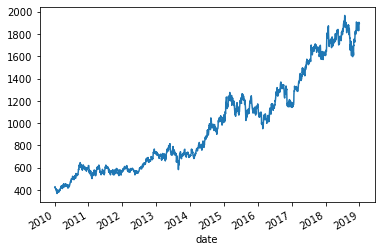

In [100]:
hdfc.plot(figsize=(6,4))

In [20]:
import investpy

In [17]:
nifty50_investing = pd.read_csv("nifty50_investing.csv",  index_col=[1])
nifty50_investing.head()

,Company
symbol,
AXBK,AXIS Bank
APSE,Adani
ASPN,Asian Paints
BAJA,Bajaj Auto
BJFN,Bajaj Finance


In [105]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('ind/nifty50_investing/metadata', nifty50_investing)

In [106]:
tickers = nifty50_investing.index
print(tickers)

Index(['AXBK', 'APSE', 'ASPN', 'BAJA', 'BJFN', 'BJFS', 'BPCL', 'BRTI', 'BHRI',
       'BRIT', 'CIPL', 'COAL', 'REDY', 'EICH', 'GAIL', 'GRAS', 'HCLT', 'HDBK',
       'HROM', 'HALC', 'HLL', 'HDFC', 'ICBK', 'ITC', 'IOC', 'INBK', 'INFY',
       'JSTL', 'KTKM', 'LART', 'MAHM', 'MRTI', 'NTPC', 'NEST', 'ONGC', 'PGRD',
       'RELI', 'SBI', 'SHCM', 'SUN', 'TCS', 'TAMO', 'TISC', 'TEML', 'TITN',
       'UPLL', 'ULTC', 'VDAN', 'WIPR', 'ZEE'],
      dtype='object', name='symbol')


In [107]:
for ticker in tickers:
    df = investpy.get_stock_historical_data(ticker,country='India',from_date='01/01/2000',
                                        to_date='10/12/2020')
    df = df.sort_values(by='Date', ascending=True)
    df = df[~df.index.duplicated()]
    df = df.drop('Currency', axis=1)
    df.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace=True)
    df.index.name = 'date'
    df = df[~df.index.duplicated()]
    df.to_csv(f'../Data-Daily/investing/{ticker}.csv')
    print('Processed...', f'{ticker}')

Processed... AXBK
Processed... APSE
Processed... ASPN
Processed... BAJA
Processed... BJFN
Processed... BJFS
Processed... BPCL
Processed... BRTI
Processed... BHRI
Processed... BRIT
Processed... CIPL
Processed... COAL
Processed... REDY
Processed... EICH
Processed... GAIL
Processed... GRAS
Processed... HCLT
Processed... HDBK
Processed... HROM
Processed... HALC
Processed... HLL
Processed... HDFC
Processed... ICBK
Processed... ITC
Processed... IOC
Processed... INBK
Processed... INFY
Processed... JSTL
Processed... KTKM
Processed... LART
Processed... MAHM
Processed... MRTI
Processed... NTPC
Processed... NEST
Processed... ONGC
Processed... PGRD
Processed... RELI
Processed... SBI
Processed... SHCM
Processed... SUN
Processed... TCS
Processed... TAMO
Processed... TISC
Processed... TEML
Processed... TITN
Processed... UPLL
Processed... ULTC
Processed... VDAN
Processed... WIPR
Processed... ZEE


In [2]:
path = '../Data-Daily/investing'
tickers = [f[:-4] for f in listdir(path)]
print(tickers)

['APSE', 'ASPN', 'AXBK', 'BAJA', 'BHRI', 'BJFN', 'BJFS', 'BPCL', 'BRIT', 'BRTI', 'CIPL', 'COAL', 'EICH', 'GAIL', 'GRAS', 'HALC', 'HCLT', 'HDBK', 'HDFC', 'HLL', 'HROM', 'ICBK', 'INBK', 'INFY', 'IOC', 'ITC', 'JSTL', 'KTKM', 'LART', 'MAHM', 'MRTI', 'NEST', 'NTPC', 'ONGC', 'PGRD', 'REDY', 'RELI', 'SBI', 'SHCM', 'SUN', 'TAMO', 'TCS', 'TEML', 'TISC', 'TITN', 'ULTC', 'UPLL', 'VDAN', 'WIPR', 'ZEE']


In [3]:
def get(tickers): 
    def data(ticker):
        print('Processing...', f'{ticker}')
        return pd.read_csv('{}/{}.csv'.format(path, ticker), index_col=[0], parse_dates=[0])
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['ticker', 'date']))
               
prices = get(tickers)

Processing... APSE
Processing... ASPN
Processing... AXBK
Processing... BAJA
Processing... BHRI
Processing... BJFN
Processing... BJFS
Processing... BPCL
Processing... BRIT
Processing... BRTI
Processing... CIPL
Processing... COAL
Processing... EICH
Processing... GAIL
Processing... GRAS
Processing... HALC
Processing... HCLT
Processing... HDBK
Processing... HDFC
Processing... HLL
Processing... HROM
Processing... ICBK
Processing... INBK
Processing... INFY
Processing... IOC
Processing... ITC
Processing... JSTL
Processing... KTKM
Processing... LART
Processing... MAHM
Processing... MRTI
Processing... NEST
Processing... NTPC
Processing... ONGC
Processing... PGRD
Processing... REDY
Processing... RELI
Processing... SBI
Processing... SHCM
Processing... SUN
Processing... TAMO
Processing... TCS
Processing... TEML
Processing... TISC
Processing... TITN
Processing... ULTC
Processing... UPLL
Processing... VDAN
Processing... WIPR
Processing... ZEE


In [4]:
prices.head()

open    high     low   close   volume
ticker date                                               
APSE   2008-01-02  262.05  264.80  254.00  261.49  3519075
       2008-01-03  261.00  262.94  252.23  255.16  2525290
       2008-01-04  255.76  258.96  246.60  248.07  2753975
       2008-01-07  248.00  255.78  243.00  245.45  3154815
       2008-01-08  248.00  251.00  237.00  240.96  2652495

In [7]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('ind/nifty50_investing/prices', prices)

In [18]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/bse/bse50/metadata                        frame        (shape->[49,6])     
/bse/bse500/metadata                       frame        (shape->[472,7])    
/ind/bse500/prices                         frame        (shape->[1707187,7])
/ind/equity/prices                         frame        (shape->[1755502,7])
/ind/nifty50_investing/metadata            frame        (shape->[1,1])      
/ind/nifty50_investing/prices              frame        (shape->[213669,5]) 
/mf_eft/metadata                           frame        (shape->[23,5])     
/nse/nifty100/metadata                     frame        (shape->[1,4])      
/nse/nifty100_mid/metadata                 frame        (shape->[1,4])      
/nse/nifty100_small/metadata               frame        (shape->[1,4])      
/nse/nifty200/metadata                     frame        (shape->[1,4])      
/nse/nifty50/metadata                      frame        (shape->[1,4])     

In [115]:
# with pd.HDFStore('../machine-learning-for-trading-master/machine-learning-for-trading-master/data/nse_asset.h5') as store:
#     print(store.info())

In [32]:
investing_meta = investpy.get_stocks(country='India')

In [33]:
investing_meta.head()

,country,name,full_name,isin,currency,symbol
0,india,Aditya Birla Capital,Aditya Birla Capital Ltd,INE674K01013,INR,ADTB
1,india,Hubtown,Hubtown Ltd,INE703H01016,INR,HUBT
2,india,3i Infotech,3i Infotech Ltd,INE748C01020,INR,TIIN
3,india,3M India,3M India Ltd.,INE470A01017,INR,TMIN
4,india,ABB India,ABB India Ltd,INE117A01022,INR,ABB


In [34]:
investing_meta = investing_meta.set_index('isin')
investing_meta.head()

,country,name,full_name,currency,symbol
isin,,,,,
INE674K01013,india,Aditya Birla Capital,Aditya Birla Capital Ltd,INR,ADTB
INE703H01016,india,Hubtown,Hubtown Ltd,INR,HUBT
INE748C01020,india,3i Infotech,3i Infotech Ltd,INR,TIIN
INE470A01017,india,3M India,3M India Ltd.,INR,TMIN
INE117A01022,india,ABB India,ABB India Ltd,INR,ABB


In [42]:
with pd.HDFStore(DATA_STORE) as store:
    nifty50_m = (store['/nse/nifty50/metadata'])
nifty50_m.head(2)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,INE742F01042
ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,INE021A01026


In [43]:
nifty50_m = nifty50_m.reset_index().set_index('ISIN Code')
nifty50_m.index.name = 'isin'
nifty50_m.head()

,Symbol,Company Name,Industry,Series
isin,,,,
INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ
INE021A01026,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ
INE238A01034,AXISBANK,Axis Bank Ltd.,FINANCIAL SERVICES,EQ
INE917I01010,BAJAJ-AUTO,Bajaj Auto Ltd.,AUTOMOBILE,EQ
INE296A01024,BAJFINANCE,Bajaj Finance Ltd.,FINANCIAL SERVICES,EQ


In [50]:
nifty50_m = nifty50_m.join(investing_meta,)
nifty50_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE742F01042,INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,india,Adani,Adani Port and Special Economic Zone Ltd,INR,APSE
INE742F01042,INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,india,Adani,Adani Port and Special Economic Zone Ltd,INR,APSE
INE021A01026,INE021A01026,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,india,Asian Paints,Asian Paints Ltd.,INR,ASPN
INE021A01026,INE021A01026,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,india,Asian Paints,Asian Paints Ltd.,INR,ASPN
INE238A01034,INE238A01034,AXISBANK,Axis Bank Ltd.,FINANCIAL SERVICES,EQ,india,AXIS Bank,AXIS Bank Ltd,INR,AXBK


In [64]:
nifty50_m = nifty50_m[~nifty50_m.index.duplicated()]
nifty50_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE742F01042,INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,india,Adani,Adani Port and Special Economic Zone Ltd,INR,APSE
INE021A01026,INE021A01026,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,india,Asian Paints,Asian Paints Ltd.,INR,ASPN
INE238A01034,INE238A01034,AXISBANK,Axis Bank Ltd.,FINANCIAL SERVICES,EQ,india,AXIS Bank,AXIS Bank Ltd,INR,AXBK
INE917I01010,INE917I01010,BAJAJ-AUTO,Bajaj Auto Ltd.,AUTOMOBILE,EQ,india,Bajaj Auto,Bajaj Auto Ltd,INR,BAJA
INE296A01024,INE296A01024,BAJFINANCE,Bajaj Finance Ltd.,FINANCIAL SERVICES,EQ,india,Bajaj Finance,Bajaj Finance Ltd,INR,BJFN


In [66]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('/nse/nifty50/metadata', nifty50_m)

In [67]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/bse/bse50/metadata                      frame        (shape->[49,6])     
/bse/bse500/metadata                     frame        (shape->[472,7])    
/ind/bse500/prices                       frame        (shape->[1707187,7])
/ind/equity/prices                       frame        (shape->[1755502,7])
/ind/investing_meta/metadata             frame        (shape->[1,5])      
/ind/nifty50_investing/prices            frame        (shape->[213669,5]) 
/mf_eft/metadata                         frame        (shape->[23,5])     
/nse/nifty100/metadata                   frame        (shape->[1,4])      
/nse/nifty100_mid/metadata               frame        (shape->[1,4])      
/nse/nifty100_small/metadata             frame        (shape->[1,4])      
/nse/nifty200/metadata                   frame        (shape->[1,4])      
/nse/nifty50/metadata                    frame        (shape->[1,10])     
/nse/nifty500/metadata

In [68]:
with pd.HDFStore(DATA_STORE) as store:
    nifty50_m = (store['/nse/nifty50/metadata'])
nifty50_m.head(2)

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE742F01042,INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,india,Adani,Adani Port and Special Economic Zone Ltd,INR,APSE
INE021A01026,INE021A01026,ASIANPAINT,Asian Paints Ltd.,CONSUMER GOODS,EQ,india,Asian Paints,Asian Paints Ltd.,INR,ASPN


In [71]:
# with pd.HDFStore(DATA_STORE) as store:
#     store.remove('/ind/nifty50_investing/metadata')

In [59]:
nifty100_m = nifty100_m.reset_index().set_index('ISIN Code')
nifty100_m.index.name = 'isin'
nifty100_m.head()

,Symbol,Company Name,Industry,Series
isin,,,,
INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ
INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ
INE364U01010,ADANIGREEN,Adani Green Energy Ltd.,POWER,EQ
INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ
INE931S01010,ADANITRANS,Adani Transmission Ltd.,POWER,EQ


In [60]:
nifty100_m = nifty100_m.join(investing_meta,on=nifty100_m.index)
nifty100_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE012A01025,INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,ACC,ACC Ltd,INR,ACC
INE012A01025,INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,ACC,ACC Ltd,INR,ACC
INE358A01014,INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ,india,Abbott India,Abbott India Ltd,INR,ABOT
INE358A01014,INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ,india,Abbott India,Abbott India Ltd,INR,ABOT
INE364U01010,INE364U01010,ADANIGREEN,Adani Green Energy Ltd.,POWER,EQ,india,Adani Green Energy,Adani Green Energy Ltd,INR,ADNA


In [73]:
nifty100_m = nifty100_m[~nifty100_m.index.duplicated()]
nifty100_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE012A01025,INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,ACC,ACC Ltd,INR,ACC
INE358A01014,INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ,india,Abbott India,Abbott India Ltd,INR,ABOT
INE364U01010,INE364U01010,ADANIGREEN,Adani Green Energy Ltd.,POWER,EQ,india,Adani Green Energy,Adani Green Energy Ltd,INR,ADNA
INE742F01042,INE742F01042,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,SERVICES,EQ,india,Adani,Adani Port and Special Economic Zone Ltd,INR,APSE
INE931S01010,INE931S01010,ADANITRANS,Adani Transmission Ltd.,POWER,EQ,india,Adani Transmission Ltd,Adani Transmission Ltd,INR,ADAI


In [74]:
nifty100_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, INE012A01025 to INE075A01022
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key_0         100 non-null    object
 1   Symbol        100 non-null    object
 2   Company Name  100 non-null    object
 3   Industry      100 non-null    object
 4   Series        100 non-null    object
 5   country       98 non-null     object
 6   name          98 non-null     object
 7   full_name     98 non-null     object
 8   currency      98 non-null     object
 9   symbol        98 non-null     object
dtypes: object(10)
memory usage: 8.6+ KB


In [75]:
nifty100_m.tail()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE628A01036,INE628A01036,UPL,UPL Ltd.,FERTILISERS & PESTICIDES,EQ,india,UPL,UPL Ltd,INR,UPLL
INE481G01011,INE481G01011,ULTRACEMCO,UltraTech Cement Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,UltraTech Cement,UltraTech Cement Ltd,INR,ULTC
INE686F01025,INE686F01025,UBL,United Breweries Ltd.,CONSUMER GOODS,EQ,india,United Breweries Ltd,United Breweries Ltd.,INR,UBBW
INE854D01024,INE854D01024,MCDOWELL-N,United Spirits Ltd.,CONSUMER GOODS,EQ,india,United Spirits,United Spirits Ltd,INR,UNSP
INE075A01022,INE075A01022,WIPRO,Wipro Ltd.,IT,EQ,india,Wipro,Wipro Ltd,INR,WIPR


In [77]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty100/metadata', nifty100_m)

In [81]:
with pd.HDFStore(DATA_STORE) as store:
    nifty200_m = (store['/nse/nifty200/metadata'])
nifty200_m.head(2)

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
AUBANK,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017


In [82]:
nifty200_m = nifty200_m.reset_index().set_index('ISIN Code')
nifty200_m.index.name = 'isin'
nifty200_m.head()

,Symbol,Company Name,Industry,Series
isin,,,,
INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ
INE949L01017,AUBANK,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ
INE769A01020,AARTIIND,Aarti Industries Ltd.,CHEMICALS,EQ
INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ
INE423A01024,ADANIENT,Adani Enterprises Ltd.,SERVICES,EQ


In [83]:
nifty200_m = nifty200_m.join(investing_meta,on=nifty200_m.index)
nifty200_m = nifty200_m[~nifty200_m.index.duplicated()]
nifty200_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE012A01025,INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,ACC,ACC Ltd,INR,ACC
INE949L01017,INE949L01017,AUBANK,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,india,AU Small Finance Bank,AU Small Finance Bank Ltd,INR,AUFI
INE769A01020,INE769A01020,AARTIIND,Aarti Industries Ltd.,CHEMICALS,EQ,india,Aarti Industries,Aarti Industries Ltd,INR,ARTI
INE358A01014,INE358A01014,ABBOTINDIA,Abbott India Ltd.,PHARMA,EQ,india,Abbott India,Abbott India Ltd,INR,ABOT
INE423A01024,INE423A01024,ADANIENT,Adani Enterprises Ltd.,SERVICES,EQ,india,Adani Enterprises,Adani Enterprises Ltd,INR,ADEL


In [84]:
nifty200_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, INE012A01025 to INE256A01028
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key_0         200 non-null    object
 1   Symbol        200 non-null    object
 2   Company Name  200 non-null    object
 3   Industry      200 non-null    object
 4   Series        200 non-null    object
 5   country       197 non-null    object
 6   name          197 non-null    object
 7   full_name     197 non-null    object
 8   currency      197 non-null    object
 9   symbol        197 non-null    object
dtypes: object(10)
memory usage: 17.2+ KB


In [86]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty200/metadata', nifty200_m)

In [88]:
nifty500_m.head()

,Company Name,Industry,Series,ISIN Code
Symbol,,,,
3MINDIA,3M India Ltd.,SERVICES,EQ,INE470A01017
ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE117A01022
POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE07Y701011
ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
AIAENG,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE212H01026


In [89]:
nifty500_m = nifty500_m.reset_index().set_index('ISIN Code')
nifty500_m.index.name = 'isin'
nifty500_m.head()

,Symbol,Company Name,Industry,Series
isin,,,,
INE470A01017,3MINDIA,3M India Ltd.,SERVICES,EQ
INE117A01022,ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ
INE07Y701011,POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ
INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ
INE212H01026,AIAENG,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ


In [91]:
nifty500_m = nifty500_m.join(investing_meta,on=nifty500_m.index)
nifty500_m = nifty500_m[~nifty500_m.index.duplicated()]
nifty500_m.head()

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE470A01017,INE470A01017,3MINDIA,3M India Ltd.,SERVICES,EQ,india,3M India,3M India Ltd.,INR,TMIN
INE117A01022,INE117A01022,ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ,india,ABB India,ABB India Ltd,INR,ABB
INE07Y701011,INE07Y701011,POWERINDIA,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,EQ,NaN,NaN,NaN,NaN,NaN
INE012A01025,INE012A01025,ACC,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,india,ACC,ACC Ltd,INR,ACC
INE212H01026,INE212H01026,AIAENG,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ,india,AIA Engineering,AIA Engineering Ltd,INR,AIAE


In [92]:
nifty500_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, INE470A01017 to INE738I01010
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key_0         501 non-null    object
 1   Symbol        501 non-null    object
 2   Company Name  501 non-null    object
 3   Industry      501 non-null    object
 4   Series        501 non-null    object
 5   country       482 non-null    object
 6   name          482 non-null    object
 7   full_name     482 non-null    object
 8   currency      482 non-null    object
 9   symbol        482 non-null    object
dtypes: object(10)
memory usage: 43.1+ KB


In [94]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('nse/nifty500/metadata', nifty500_m)

In [95]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/bse/bse50/metadata                      frame        (shape->[49,6])     
/bse/bse500/metadata                     frame        (shape->[472,7])    
/ind/bse500/prices                       frame        (shape->[1707187,7])
/ind/equity/prices                       frame        (shape->[1755502,7])
/ind/investing_meta/metadata             frame        (shape->[1,5])      
/ind/nifty50_investing/prices            frame        (shape->[213669,5]) 
/mf_eft/metadata                         frame        (shape->[23,5])     
/nse/nifty100/metadata                   frame        (shape->[1,10])     
/nse/nifty100_mid/metadata               frame        (shape->[1,4])      
/nse/nifty100_small/metadata             frame        (shape->[1,4])      
/nse/nifty200/metadata                   frame        (shape->[1,10])     
/nse/nifty50/metadata                    frame        (shape->[1,10])     
/nse/nifty500/metadata

In [96]:
with pd.HDFStore(DATA_STORE) as store:
    nifty500_m = (store['/nse/nifty500/metadata'])
nifty500_m.head(2)

,key_0,Symbol,Company Name,Industry,Series,country,name,full_name,currency,symbol
isin,,,,,,,,,,
INE470A01017,INE470A01017,3MINDIA,3M India Ltd.,SERVICES,EQ,india,3M India,3M India Ltd.,INR,TMIN
INE117A01022,INE117A01022,ABB,ABB India Ltd.,INDUSTRIAL MANUFACTURING,EQ,india,ABB India,ABB India Ltd,INR,ABB


In [100]:
tickers = nifty500_m.dropna().symbol.to_list()
print(tickers)
print(len(tickers))

['TMIN', 'ABB', 'ACC', 'AIAE', 'APLA', 'AUFI', 'ADRG', 'ARTI', 'AVAS', 'ABOT', 'ADEL', 'ADAG', 'ADNA', 'APSE', 'ADAI', 'ADTB', 'ADIA', 'ADEN', 'AEGS', 'AFFL', 'AJPH', 'AKZO', 'ALEM', 'ALKE', 'ALKY', 'AMAR', 'AMBE', 'ABUJ', 'APLH', 'APLO', 'ASOK', 'ABDL', 'ASPN', 'ATRD', 'ASTR', 'ASPT', 'ATLP', 'ARBN', 'AVNT', 'AVEU', 'AXBK', 'BASF', 'BEML', 'BSEL', 'BAJA', 'BACO', 'BJEL', 'BJFN', 'BJFS', 'BJAT', 'BLKI', 'BLMR', 'BACH', 'BANH', 'BOB', 'BOI', 'BMBK', 'BATA', 'BAYE', 'BRGR', 'BARA', 'BAJE', 'BFRG', 'BHEL', 'BPCL', 'BRTI', 'BHRI', 'BION', 'BRLC', 'BIRS', 'BLIS', 'BLDT', 'BLUS', 'BBRM', 'BDYN', 'BOSH', 'BRIG', 'BRIT', 'CREI', 'CCLP', 'CESC', 'CRSL', 'CADI', 'CNFH', 'CNBK', 'CAPL', 'CAPG', 'CRBR', 'CAST', 'CEAT', 'CBI', 'CENA', 'CNTP', 'CNTY', 'CERA', 'CHAL', 'CHMB', 'CHPC', 'CHOL', 'CHLA', 'CIPL', 'CTBK', 'COAL', 'COCH', 'NITT', 'COLG', 'CCRI', 'CORF', 'CRDE', 'CROP', 'CUMM', 'CYIE', 'DBCL', 'DCBA', 'DCMS', 'DLF', 'DABU', 'DALB', 'DPNT', 'DELT', 'INDB', 'DHNP', 'DIBL', 'DSTV', 'DSHM', 'DIVI

In [101]:
for ticker in tickers:
    df = investpy.get_stock_historical_data(ticker,country='India',from_date='01/01/2000',
                                        to_date='24/12/2020')
    df = df.sort_values(by='Date', ascending=True)
    df = df[~df.index.duplicated()]
    df = df.drop('Currency', axis=1)
    df.rename(columns = {'Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}, inplace=True)
    df.index.name = 'date'
    df = df[~df.index.duplicated()]
    df.to_csv(f'../Data-Daily/investing/{ticker}.csv')
    print('Processed...', f'{ticker}')

Processed... TMIN
Processed... ABB
Processed... ACC
Processed... AIAE
Processed... APLA
Processed... AUFI
Processed... ADRG
Processed... ARTI
Processed... AVAS
Processed... ABOT
Processed... ADEL
Processed... ADAG
Processed... ADNA
Processed... APSE
Processed... ADAI
Processed... ADTB
Processed... ADIA
Processed... ADEN
Processed... AEGS
Processed... AFFL
Processed... AJPH
Processed... AKZO
Processed... ALEM
Processed... ALKE
Processed... ALKY
Processed... AMAR
Processed... AMBE
Processed... ABUJ
Processed... APLH
Processed... APLO
Processed... ASOK
Processed... ABDL
Processed... ASPN
Processed... ATRD
Processed... ASTR
Processed... ASPT
Processed... ATLP
Processed... ARBN
Processed... AVNT
Processed... AVEU
Processed... AXBK
Processed... BASF
Processed... BEML
Processed... BSEL
Processed... BAJA
Processed... BACO
Processed... BJEL
Processed... BJFN
Processed... BJFS
Processed... BJAT
Processed... BLKI
Processed... BLMR
Processed... BACH
Processed... BANH
Processed... BOB
Processed... 

Processed... UNSP
Processed... VGUA
Processed... VMAR
Processed... VIPI
Processed... VRLL
Processed... VSTI
Processed... VAIB
Processed... VAKR
Processed... VART
Processed... VARE
Processed... VARB
Processed... VENK
Processed... VODA
Processed... VOLT
Processed... WABC
Processed... WGSR
Processed... WLSP
Processed... WEST
Processed... WHIR
Processed... WIPR
Processed... WCKH
Processed... ZEE
Processed... ZENT
Processed... ZYDS
Processed... ECLE


In [102]:
path = '../Data-Daily/investing'
tickers = [f[:-4] for f in listdir(path)]
print(tickers)

['ABB', 'ABDL', 'ABOT', 'ABUJ', 'ACC', 'ADAG', 'ADAI', 'ADEL', 'ADEN', 'ADIA', 'ADNA', 'ADRG', 'ADTB', 'AEGS', 'AFFL', 'AIAE', 'AJPH', 'AKZO', 'ALEM', 'ALKE', 'ALKY', 'AMAR', 'AMBE', 'APLA', 'APLH', 'APLO', 'APSE', 'ARBN', 'ARTI', 'ASOK', 'ASPN', 'ASPT', 'ASTR', 'ATLP', 'ATRD', 'AUFI', 'AVAS', 'AVEU', 'AVNT', 'AXBK', 'BACH', 'BACO', 'BAJA', 'BAJE', 'BANH', 'BARA', 'BASF', 'BATA', 'BAYE', 'BBRM', 'BDYN', 'BEML', 'BFRG', 'BHEL', 'BHRI', 'BION', 'BIRS', 'BJAT', 'BJEL', 'BJFN', 'BJFS', 'BLDT', 'BLIS', 'BLKI', 'BLMR', 'BLUS', 'BMBK', 'BOB', 'BOI', 'BOSH', 'BPCL', 'BRGR', 'BRIG', 'BRIT', 'BRLC', 'BRTI', 'BSEL', 'CADI', 'CAPG', 'CAPL', 'CAST', 'CBI', 'CCLP', 'CCRI', 'CEAT', 'CENA', 'CERA', 'CESC', 'CHAL', 'CHLA', 'CHMB', 'CHOL', 'CHPC', 'CIPL', 'CNBK', 'CNFH', 'CNTP', 'CNTY', 'COAL', 'COCH', 'COLG', 'CORF', 'CRBR', 'CRDE', 'CREI', 'CROP', 'CRSL', 'CTBK', 'CUMM', 'CYIE', 'DABU', 'DALB', 'DBCL', 'DCBA', 'DCMS', 'DELT', 'DHNP', 'DIBL', 'DIVI', 'DIXO', 'DLF', 'DLPA', 'DPNT', 'DSHM', 'DSTV', 'ECLE

In [103]:
def get(tickers): 
    def data(ticker):
        print('Processing...', f'{ticker}')
        return pd.read_csv('{}/{}.csv'.format(path, ticker), index_col=[0], parse_dates=[0])
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['ticker', 'date']))
               
prices = get(tickers)

Processing... ABB
Processing... ABDL
Processing... ABOT
Processing... ABUJ
Processing... ACC
Processing... ADAG
Processing... ADAI
Processing... ADEL
Processing... ADEN
Processing... ADIA
Processing... ADNA
Processing... ADRG
Processing... ADTB
Processing... AEGS
Processing... AFFL
Processing... AIAE
Processing... AJPH
Processing... AKZO
Processing... ALEM
Processing... ALKE
Processing... ALKY
Processing... AMAR
Processing... AMBE
Processing... APLA
Processing... APLH
Processing... APLO
Processing... APSE
Processing... ARBN
Processing... ARTI
Processing... ASOK
Processing... ASPN
Processing... ASPT
Processing... ASTR
Processing... ATLP
Processing... ATRD
Processing... AUFI
Processing... AVAS
Processing... AVEU
Processing... AVNT
Processing... AXBK
Processing... BACH
Processing... BACO
Processing... BAJA
Processing... BAJE
Processing... BANH
Processing... BARA
Processing... BASF
Processing... BATA
Processing... BAYE
Processing... BBRM
Processing... BDYN
Processing... BEML
Processing... 

Processing... TRCE
Processing... TREN
Processing... TTCH
Processing... TTEX
Processing... TTKL
Processing... TTPW
Processing... TVEB
Processing... TVSM
Processing... TVTO
Processing... UBBW
Processing... UCBK
Processing... UFLX
Processing... UJVF
Processing... ULTC
Processing... UNBK
Processing... UNSP
Processing... UPLL
Processing... VAIB
Processing... VAKR
Processing... VARB
Processing... VARE
Processing... VART
Processing... VDAN
Processing... VENK
Processing... VGUA
Processing... VIPI
Processing... VMAR
Processing... VODA
Processing... VOLT
Processing... VRLL
Processing... VSTI
Processing... WABC
Processing... WCKH
Processing... WEST
Processing... WGSR
Processing... WHIR
Processing... WIPR
Processing... WLSP
Processing... ZEE
Processing... ZENT
Processing... ZYDS


In [104]:
prices.tail()

open     high      low    close  volume
ticker date                                                  
ZYDS   2020-12-18  1929.95  1970.00  1895.00  1929.45   47654
       2020-12-21  1935.70  1935.70  1833.25  1872.70   34549
       2020-12-22  1850.00  1898.05  1816.00  1885.95   17275
       2020-12-23  1885.95  1920.00  1875.40  1904.75   17931
       2020-12-24  1919.00  2010.00  1886.00  1947.60   53382

In [105]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('ind/nifty500_investing/prices', prices)

In [106]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: ../Data-Daily/india_asset.h5
/bse/bse50/metadata                       frame        (shape->[49,6])     
/bse/bse500/metadata                      frame        (shape->[472,7])    
/ind/bse500/prices                        frame        (shape->[1707187,7])
/ind/equity/prices                        frame        (shape->[1755502,7])
/ind/investing_meta/metadata              frame        (shape->[1,5])      
/ind/nifty500_investing/prices            frame        (shape->[1462693,5])
/ind/nifty50_investing/prices             frame        (shape->[213669,5]) 
/mf_eft/metadata                          frame        (shape->[23,5])     
/nse/nifty100/metadata                    frame        (shape->[1,10])     
/nse/nifty100_mid/metadata                frame        (shape->[1,4])      
/nse/nifty100_small/metadata              frame        (shape->[1,4])      
/nse/nifty200/metadata                    frame        (shape->[1,10])     
/nse/nifty